# SOK-1006 V23

## Forelesning 10 - Mer om kostnadsminimering

### 1. Oppskrift for kostnadsminimering

Vi ser på en bedrift som bruker arbeidskraft og kapital til å produsere et gode gjennom bruk av følgende teknologi: $x=f(N,K)$. Da kan vi skrive kostnadsminimeringsproblemet som:        
$$ min_{N,K}\;wN+rK \;\; ubb\;\; x_0=f(N,K).$$

Vi har oppdaget at to ting må være oppfylt for å finne verdier på $N,K$ som gir et kostnadsminimum:

$$\begin{align}
\frac{w}{r}&=\frac{f'_N}{f'_K} \tag{1}\\
x_0 &=f(N,K) \tag {2}\\
\end{align}$$

La oss bruke disse betingelsene i et eksempel hvor $f(N,K)=N^{0.5}K^{0.5}, w=350, r=500, x_0=10.$



In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [12]:
N,K=sp.symbols('N K', real=True, positive=True)

In [3]:
# produktfunksjon
def x(N,K):
    return (N**.5)*(K**.5)
x(N,K)

K**0.5*N**0.5

In [6]:
# likning 1, mtsb
df_K=sp.diff(x(N,K),K)
df_N=sp.diff(x(N,K),N)
mtsb=df_N/df_K
display(mtsb)


1.0*K**1.0/N**1.0

Da kan likning (1) skrives $\frac{350}{500}=\frac{K}{N}$, eller $K=\frac{350}{500}N$. Dette kan vi sette inn i likning (2) for å sikre at den optimale kombinasjonen tilfredsstiller produksjonsbetingelsen.

In [9]:
prod=x(N,K).subs(K, 350*N/500)
display(prod)

0.836660026534076*N**1.0

In [15]:
# finn optimal verdi på N
opt_N = sp.solve(prod-10, N)
display(opt_N)

[11.9522860933439]

Dette er optimal mengde arbeidskraft! Optimal mengde kapital blir da $K=\frac{350}{500}(11.95)=8.365$. Da har vi funnet mengder arbeidskraft og kapital som minimerer produksjonskostnaden på 10 enheter. Tenk at vi vil løse problemet for et vilkårlig produksjonsnivå $X$. Da løser vi følgende:

In [32]:
X=sp.symbols('X', positive=True, real=True)
løsn_X=sp.solve([x(N,K)-X, K-(350/500)*N], K,N)
løsn_X

[(0.836660026534076*X, 1.19522860933439*X)]

Dette er den optimale tilpasningen for å produsere X enheter: $K=0.8367X, N=1.1952X$. Dermed kan vi beregne kostnaden for å produsere X enheter. La oss kalle dette $C$.

In [34]:
def C_X(X):
    return 500*0.8367*X+350*1.1952*X
C_X(X)

836.67*X

Dette viser den minimale kostnaden av å produsere X enheter. La oss vise løsningen som vi har funnet grafisk. Først tegner vi produksjonsisokvanten for $X=10$.

In [35]:
# Definer isokvanter
iso_X=sp.solve(x(N,K)-X,K)[0]
iso_X

X**2/N

Da er $K=\frac{X^2}{N}$ isokvanten for X enheter ferdigprodukt. Vi må gjøre dette om til et uttrykk som numpy kjenner igjen for å tegne det (`sp.lambdify`):

In [36]:
iso_fn=sp.lambdify(
    (X,N), 
    iso_X
)
iso_fn(X,N)

X**2/N

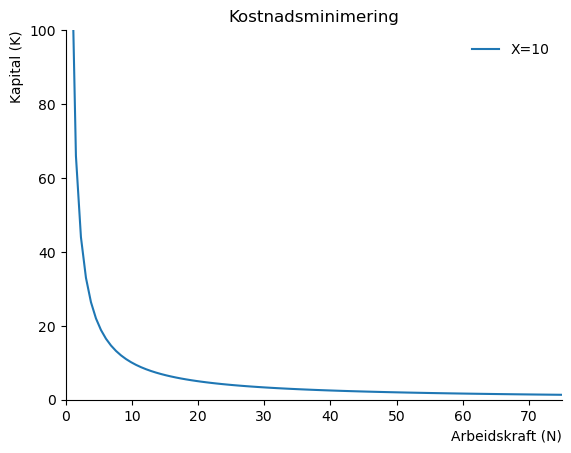

In [37]:
# tegne isokvanten for X=10

n=np.linspace(0.001,75, 100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kapital (K)', loc='top')
ax.set_xlabel('Arbeidskraft (N)', loc='right')
ax.set(xlim=(0,75))
ax.set(ylim=(0,100))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen

ax.plot(n,iso_fn(10,n), label='X=10')

# tittel
ax.set_title('Kostnadsminimering')

#vis navnene:
ax.legend(loc='best',frameon=False);

Tegne inn isokostnadskurver. For et pengebeløp C vil isokostnadsfunksjon være: $C=wN+rK$. For å tegne dette i figuren må vi få K på venstresiden: $K=\frac{C}{r}-\frac{wN}{r}$. Dette er en rett linje med helning $\frac{-w}{r}$. Her er $\frac{w}{r}$ den relative prisen på arbeidskraft.

In [38]:
# Sett inn i uttrykket for isokost
def isokost(X,N):
    return C_X(X)/500 -(350/500)*N
isokost(X,N)

-0.7*N + 1.67334*X

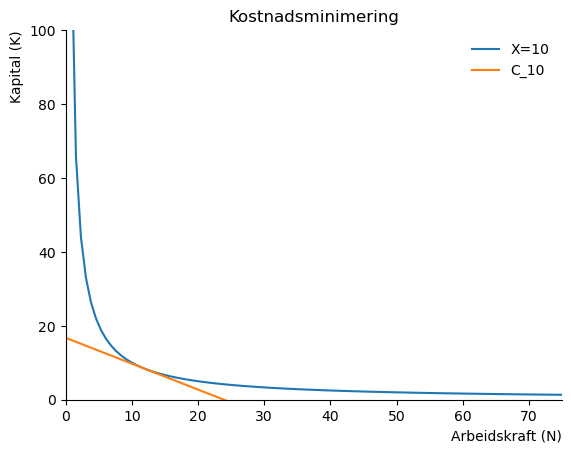

In [39]:
ax.plot(n, isokost(10,n), label='C_10')
ax.legend(loc='best',frameon=False)
fig1

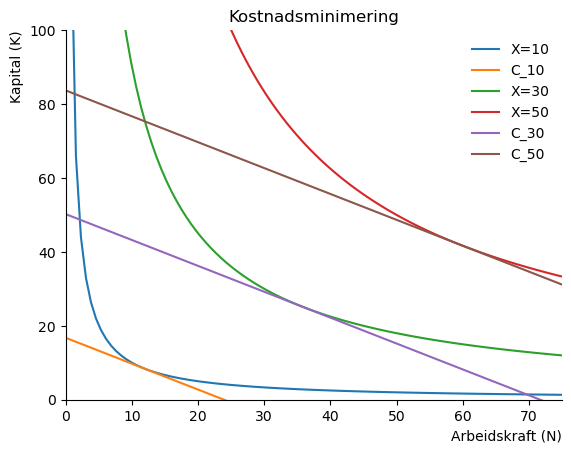

In [40]:
# sett inn isokvanter for X=30 og X=50, samt minkost for disse

ax.plot(n,iso_fn(30,n), label='X=30')
ax.plot(n,iso_fn(50,n), label='X=50')

ax.plot(n, isokost(30,n), label='C_30')
ax.plot(n, isokost(50,n), label='C_50')

ax.legend(loc='best',frameon=False)

fig1

Tidligere fant vi et fast forhold mellom kapital og arbeidskraft i en kostnadsminimerende løsning: $K=\frac{w}{r}N$. Dette kalles *substitumalen* og går gjennom alle kostnadsminimerende punkter.

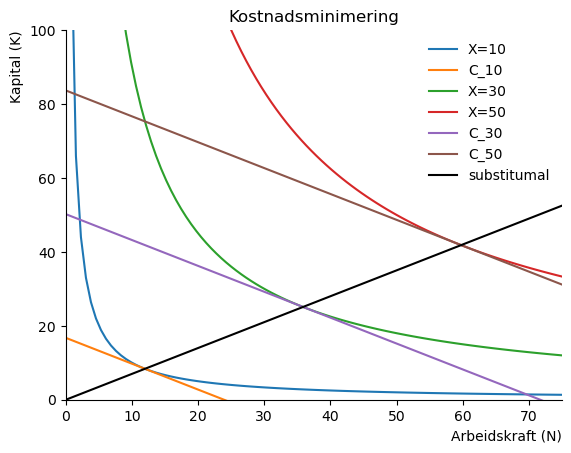

In [41]:
def substitumal(w,r,N):
    return N*w/r
ax.plot(n,substitumal(350,500,n),  color='black', label='substitumal')
ax.legend(loc='best',frameon=False)
fig1

**Oppgave**      
*I tillegg til faktorkostnaden har denne bedriften en fast kostnad på 10 000 NOK. Finn et uttrykk for total produksjonskostnad for X enheter produkt. Bruk dette uttrykket til å lage en funksjon som angir gjennomsnittskostnad (AC) på lang sikt. Tegn AC funksjonen ved å sette din funksjonen inn i koden nedenfor:*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


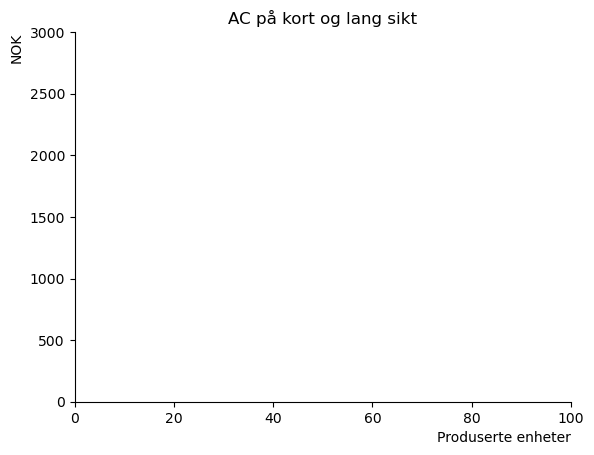

In [42]:
x_num=np.linspace(0.001,100, 100)

fig2, ax = plt.subplots()
ax.set_ylabel('NOK', loc='top')
ax.set_xlabel('Produserte enheter', loc='right')
ax.set(xlim=(0,100))
ax.set(ylim=(0,3000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen her

# ax.plot(z_num,DIN FUNKSJON, label='AC på lang sikt')

# tittel
ax.set_title('AC på kort og lang sikt')

#vis navnene:
ax.legend(loc='best',frameon=False);

**Oppgave fortsetter**      
*I forelesning 9 har dere allerede funnet et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: $C_s(X, K_0)=10000 + 500K_0 +\frac{350X^2}{K_0}$. Beregn den totale gjennomsnittskostnaden, og plott dette inn i figuren for $K=10, K=25, K=50$ sammen med AC på lang sikt. Brukk figuren til å forklare forholdet mellom gjennomsnittskostnaden på kort og lang sikt.*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


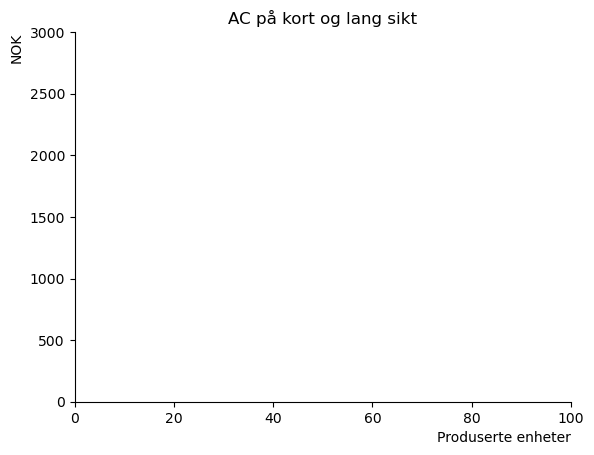

In [43]:
# skriv ditt svar her

ax.legend(loc='best',frameon=False)
fig2


### 2. Estimering

Anta at vi som økonomer tror at bedriften har følgende produktfunksjon: 
$$x=ZN^aK^b. \tag{3}$$

Ved å bruke fremgangsmåten og koden ovenfor kan vi vise at likning (1) innebærer at $K=(\frac{w}{r})(\frac{b}{a})N$. (Legg merke til at det relative forholdet mellom faktorene i en kostnadsminimerende løsning er avhnegig av både økonomiske og produksjonstekniske forhold her). Herfra kan vi finne bedriftens etterspørsel etter de to faktorene.

In [48]:
# angi nye symboler

Z,a,b,w,r =sp.symbols('Z a b w r', real=True, positive=True)

# produktfunksjon
x_0 = Z*N**a*K**b

# løs for produksjon av mengde X gitt forholdet ovenfor

K_sol=sp.solve(sp.Eq((x_0).subs(N,K*a*r/(b*w)),X),K)[0]
N_sol=sp.solve(sp.Eq((x_0).subs(K,N*b*w/(a*r)),X),N)[0]
display(K_sol)
display(N_sol)

(X*b**a*w**a/(Z*a**a*r**a))**(1/(a + b))

(X*a**b*r**b/(Z*b**b*w**b))**(1/(a + b))

In [49]:
# beregne totalkostnad

Kostnad= w*N_sol+r*K_sol
display(Kostnad)

r*(X*b**a*w**a/(Z*a**a*r**a))**(1/(a + b)) + w*(X*a**b*r**b/(Z*b**b*w**b))**(1/(a + b))

Så langt klarer vi å komme med en teoretisk modell. Som analytikere har vi tilgang til faktorpriser ($w,r$), og vi har muligens data på bedriftens produksjon og faktorforbruk. Vi kan bruke dette for å estimere verdier på det som vi ikke kjenner i produktfunksjon, nemlig $Z, a, b$. Uttrykket i (3) er ikke lineært, og det er enklere å estimere lineære sammenhenger. Da kan vi bruke logaritmer.

In [51]:
sp.log(x_0).expand(force=True)

a*log(N) + b*log(K) + log(Z)

Da kan vi skrive (3) om til

$$ ln(x)=ln(Z)+a\;ln(N)+b\;ln(K)\tag{4}$$

La oss lage litt data som vi kan estimere på.

In [56]:
from numpy import random as rd

import statsmodels as sm
import pandas as pd


samp_size=100


K_obs=np.exp(rd.normal(3,1,samp_size))


df=pd.DataFrame({'N':np.exp(rd.normal(3,1,samp_size)), 
                 'K':np.exp(rd.normal(2,1,samp_size)), 
                 'Z':np.exp(rd.normal(0,1,samp_size))
                })

df['x']=df['Z']*df['N']**(rd.rand())*df['K']**(rd.rand())

df


,N,K,Z,x
0,10.846105,4.945987,0.802010,3.336786
1,34.869374,3.736194,0.198301,0.910755
2,20.150063,65.853735,1.106161,22.695072
3,29.819064,11.432605,0.296361,2.470242
4,62.271609,0.940844,1.374487,3.296351
...,...,...,...,...
95,14.611383,4.700023,0.575585,2.484552
96,13.154862,13.353418,0.494665,3.758751
97,15.497822,20.707619,0.665902,6.717546
98,72.291082,10.266958,3.762295,35.865031


Her har vi laget 100 observasjoner på arbeidskraft og kapital (vi har også laget 100 observasjoner på Z som representerer "støy" i statistisk sammenheng). Så har vi generert et tall mellom 0 og 1 for a og et annet tall mellom 0 og 1 for b. Disse tallene har vi brukt for å lage produksjonsnivået x fra denne sammenhengen. Vi kjenner ikke verdien på a og b og må estimere verdier for disse parametre. Vi begynner med å ta logaritmer av våre dataserier.

In [58]:
df['lnN']=np.log(df['N'])
df['lnK']=np.log(df['K'])
df['lnZ']=np.log(df['Z'])
df['lnx']=np.log(df['x'])

df

,N,K,Z,x,lnN,lnK,lnZ,lnx
0,10.846105,4.945987,0.802010,3.336786,2.383806,1.598577,-0.220634,1.205008
1,34.869374,3.736194,0.198301,0.910755,3.551609,1.318068,-1.617969,-0.093481
2,20.150063,65.853735,1.106161,22.695072,3.003207,4.187436,0.100896,3.122148
3,29.819064,11.432605,0.296361,2.470242,3.395148,2.436469,-1.216176,0.904316
4,62.271609,0.940844,1.374487,3.296351,4.131506,-0.060978,0.318081,1.192816
...,...,...,...,...,...,...,...,...
95,14.611383,4.700023,0.575585,2.484552,2.681801,1.547567,-0.552368,0.910092
96,13.154862,13.353418,0.494665,3.758751,2.576791,2.591772,-0.703875,1.324087
97,15.497822,20.707619,0.665902,6.717546,2.740699,3.030502,-0.406613,1.904723
98,72.291082,10.266958,3.762295,35.865031,4.280701,2.328931,1.325029,3.579763


Nå har vi det meste av det som inngår i likning (4). Vi skal bruke pakken `statsmodels` til å gjennomføre en enkel estimering (regresjon med OLS - Ordinary Least Squares).

In [61]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='lnx ~ lnN + lnK', data=df)
res = mod.fit()
print(res.summary())
print(res.params)


                            OLS Regression Results                            
Dep. Variable:                    lnx   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     22.34
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           1.05e-08
Time:                        13:10:31   Log-Likelihood:                -147.68
No. Observations:                 100   AIC:                             301.4
Df Residuals:                      97   BIC:                             309.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4748      0.383     -1.239      0.2

Legg merke til at `res.params` gir oss ei liste med koeffisienter nederst. lnZ er "Intercept" `res.params[0]`, a er `res.params[1]`, b er `res.params[2]`. Legg merke til at `res.params[0]`=ln Z. For å finne Z må vi skrive om $e^{lnZ}=e^{res.params[0]}$, dvs $Z=e^{res.params[0]}$. Vi kan bruke dette til å sette inn fra regresjonen i kostnadsfunksjon.

In [73]:
Z_num=np.exp(res.params[0])
print("Estimert Z er",  Z_num)

Estimert Z er 0.6220388863172638


In [74]:
print("Estimert verdi på a er", res.params[1])
print("Estimert verdi på b er", res.params[2])

Estimert verdi på a er 0.3388861825113942
Estimert verdi på b er 0.5412441035028913


**Oppgave**       
*Hvilke skalaegenskaper har denne produktfunksjonen?*

Nå kan vi beregne kostnadsfunksjonen til bedriften. La oss anta som før $w=350, r=500$. Vi kan tegne totalkostnad, gjennomsnittskostnad og grensekostnad.

In [79]:
# definer funksjoner

C=sp.lambdify(
    (w, r,X,Z,a,b), 
    w*N_sol+r*K_sol
)

avgC=sp.lambdify(
    (w, r,X,Z,a,b), 
    (w*N_sol+r*K_sol)/X
)

dC=sp.lambdify(
    (w, r,X,Z,a,b), 
    sp.diff(w*N_sol+r*K_sol,X)
)

#sett inn verdier

print(C(350,500,X,Z_num,res.params[1],res.params[2]))
print(avgC(350,500,X,Z_num,res.params[1],res.params[2]))
print(dC(350,500,X,Z_num,res.params[1],res.params[2]))

1455.58552775344*X**1.13619542003099
1455.58552775344*X**0.136195420030994
1653.82961009686*X**0.136195420030994


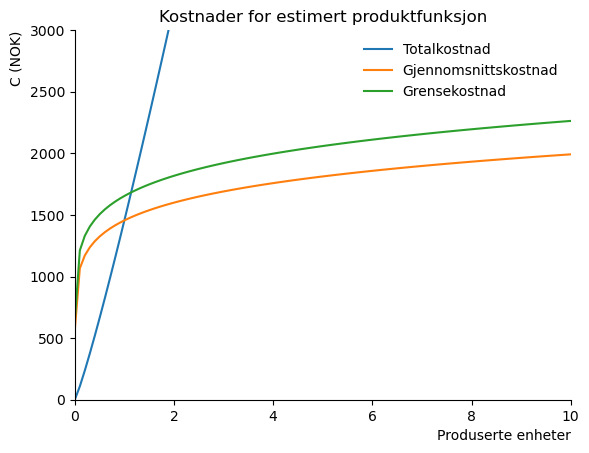

In [82]:
X=np.linspace(0.001,10, 100)

fig3, ax = plt.subplots()
ax.set_ylabel('C (NOK)', loc='top')
ax.set_xlabel('Produserte enheter', loc='right')
ax.set(xlim=(0,10))
ax.set(ylim=(0,3000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen her

ax.plot(X,
        C(350,500,X,Z_num,res.params[1],res.params[2])
        ,label='Totalkostnad')
ax.plot(X,
        avgC(350,500,X,Z_num,res.params[1],res.params[2])
        ,label='Gjennomsnittskostnad')
ax.plot(X,
        dC(350,500,X,Z_num,res.params[1],res.params[2])
        ,label='Grensekostnad')


# tittel
ax.set_title('Kostnader for estimert produktfunksjon')

#vis navnene:
ax.legend(loc='best',frameon=False);



**Oppgave**        

*Vi skal analysere årlig data fra Tesla på kapitalutgifter (USD), arbeidere, og antall biler laget i perioden 2012-2020.*    



In [84]:
# last inn data

df1=pd.read_csv("https://uit-sok-1006-v23.github.io/data/tesladata.csv",delimiter=";")


df1


,YEAR,CAPEX,Arbeidere,Produksjon
0,2012,239200000,2964,2663
1,2013,264200000,5859,22477
2,2014,969900000,10161,31655
3,2015,1635000000,13058,50658
4,2016,1440000000,17782,76285
5,2017,4081000000,37543,103181
6,2018,2319000000,48817,245506
7,2019,1432000000,48016,365232
8,2020,3232000000,70757,509737


*a) Plott disse seriene i en figur med tid på den horisontale aksen.*   


In [ ]:
# skriv svaret ditt her

*Anta at produktfunksjonen for Tesla er som gitt i (3) ovenfor. Vi skal undersøke skalaegenskaper til Teslas produktfunksjon. I forelesning 8 (paperet om Kina) så vi at man kunne estimere følgende likning for å undersøke dette:

\begin{equation}
  ln (\frac{x}{N}) = ln Z + (a+b-1)\;ln N + b\; ln (\frac{K}{N})\tag{5}
\end{equation}

Kjør følgende kode for å estimere denne likningen:

In [85]:
# Vi skal estimere ln(xperN) = konstant + (a+b-1)ln(N) +bln(KperN)

# Vi er interessert i om a+b-1 er statistisk annerledes enn 0.

# I tabellen se på t verdien på ln(N), er dette over 2 kan vi konkludere med at koeffisienten ikke er null.

# Generer variablene: husk at ln(x/N)=ln(x)-ln(N) osv
df1['lnN']=np.log(df1['Arbeidere'])
df1['lnKperN']=np.log(df1['CAPEX'])-df1['lnN']
df1['lnxperN']=np.log(df1['Produksjon'])-df1['lnN']

# Estimer ved hjelp av ols.

mod = smf.ols(formula='lnxperN ~ lnN + lnKperN', data=df1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                lnxperN   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     6.869
Date:                Thu, 05 Jan 2023   Prob (F-statistic):             0.0281
Time:                        14:34:04   Log-Likelihood:                -2.7643
No. Observations:                   9   AIC:                             11.53
Df Residuals:                       6   BIC:                             12.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7388      4.252      0.409      0.6

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


b) Hva viser din analyse om skalautbytte til Tesla?    
c) Er du fornøyd med resultatene fra analysen, eller er det noe som ikke ser helt riktig ut?    
d) Er ditt resultat forenelig med [denne analysen](https://cleantechnica.com/2018/07/22/peeking-behind-teslas-cost-of-materials-curtain/) av Tesla sine kostnader?   
e) Gitt denne analysen hvilke andre variabler bør inkluderes i (3), og hvordan vil den nye produktfunksjonen se ut (gitt at den er Cobb-Douglas)? 